In [48]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamientos

In [49]:
df = pd.read_csv('/home/mr1142/Documents/Data/mask_validation_data/train/training_data.csv')

In [50]:
df

,name,loss,BinaryAccuracy,Precision,AUC,loss_val,BinaryAccuracy_val,Precision_val,AUC_val


# Validacion

Entrenado en el dataset masks

Validado esternamente en el dataset pediatrico

In [51]:
d = pd.read_csv('/home/mr1142/Documents/Data/models/mascaras_img_class/image_class_evaluation_pediatric.csv')

In [52]:
d.head()

,nombre,model,pixels,mask,augment,frozen_layer,loss_type,lr,batch,loss,...,accuracy_score_pr_cut_external,f1_score_0.5_external,precision_score_0.5_external,recall_score_0.5_external,accuracy_score_0.5_external,f1_score_max_external,precision_score_max_external,recall_score_max_external,accuracy_score_max_external,numero
0,prueba0,Xception,512,0,True,0.8,categorical_crossentropy,0.0001,8,0.639162,...,0.257094,0.505681,0.814266,0.505176,0.505176,0.105159,0.066097,0.257094,0.257094,a
1,prueba1,Xception,512,1,True,0.8,categorical_crossentropy,0.0001,8,0.608006,...,0.257094,0.752793,0.775211,0.741948,0.741948,0.105159,0.066097,0.257094,0.257094,a
2,prueba60,Xception,512,0,True,0.8,categorical_crossentropy,0.0001,8,0.601084,...,0.257094,0.556449,0.815574,0.546779,0.546779,0.105159,0.066097,0.257094,0.257094,6
3,prueba80,Xception,512,0,True,0.8,categorical_crossentropy,0.0001,8,0.624360,...,0.257094,0.345362,0.808542,0.390337,0.390337,0.105159,0.066097,0.257094,0.257094,8
4,prueba2,Xception,512,2,True,0.8,categorical_crossentropy,0.0001,8,0.606569,...,0.257094,0.475188,0.777089,0.476419,0.476419,0.105159,0.066097,0.257094,0.257094,a


In [41]:
d['numero'] = [nombre[-2] for nombre in d.nombre]

In [42]:
d[['nombre', 'numero', 'mask', 'auc', 'auc_external']].sort_values(['numero', 'mask'])

,nombre,numero,mask,auc,auc_external
5,prueba10,1,0,0.732496,0.839741
11,prueba11,1,1,0.745655,0.847006
14,prueba12,1,2,0.737949,0.718283
16,prueba20,2,0,0.706651,0.923827
19,prueba21,2,1,0.737840,0.782895
20,prueba22,2,2,0.715425,0.785386
21,prueba30,3,0,0.718992,0.884481
23,prueba31,3,1,0.734097,0.766592
25,prueba32,3,2,0.735265,0.682956
26,prueba40,4,0,0.737208,0.826465


In [33]:
import scipy.stats as st

In [34]:
print(st.shapiro(d.auc))
print(st.shapiro(d.auc_external))

ShapiroResult(statistic=0.5995769500732422, pvalue=7.212106112319816e-08)
ShapiroResult(statistic=0.9540008306503296, pvalue=0.21609805524349213)


[(0.6, 0.8)]

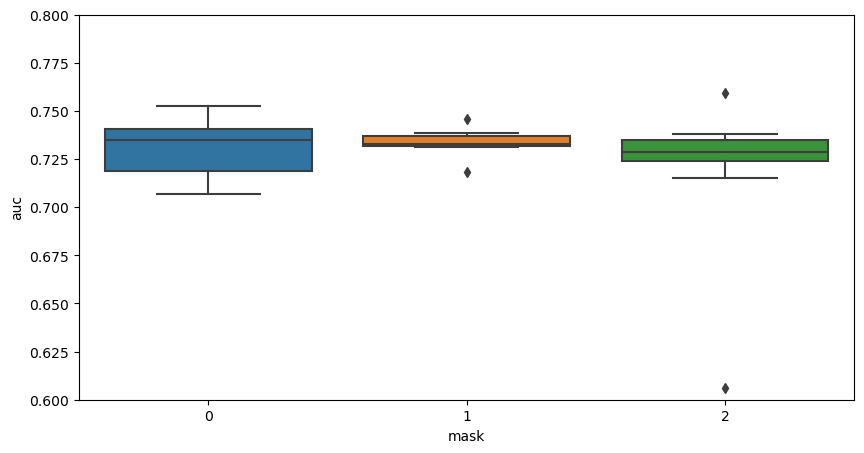

In [35]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="mask", y='auc',
                data=d)
p.set(ylim=(0.6, 0.8))

In [36]:
print(st.ttest_ind(d.auc[d['mask'] == 0], d.auc[d['mask'] == 1])[1])
print(st.ttest_ind(d.auc[d['mask'] == 0], d.auc[d['mask'] == 2])[1])
print(st.ttest_ind(d.auc[d['mask'] == 1], d.auc[d['mask'] == 2])[1])

0.5171104642868175
0.45957453411093996
0.3071501805665778


[(0.5, 1.0)]

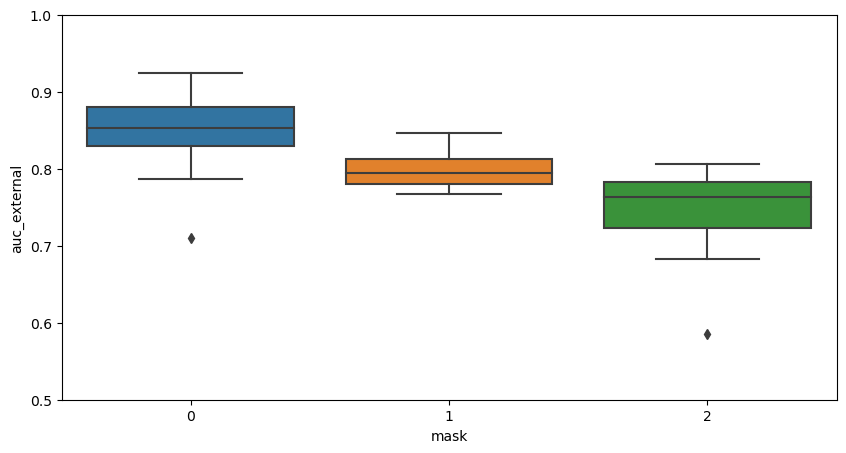

In [37]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="mask", y='auc_external',
                data=d)
p.set(ylim=(0.5, 1))

In [38]:
print(st.ttest_ind(d.auc_external[d['mask'] == 0], d.auc_external[d['mask'] == 1])[1])
print(st.ttest_ind(d.auc_external[d['mask'] == 0], d.auc_external[d['mask'] == 2])[1])
print(st.ttest_ind(d.auc_external[d['mask'] == 1], d.auc_external[d['mask'] == 2])[1])

0.037037559544312794
0.0017111405294588959
0.019357141255380305


# Cargar uno

In [79]:
path = '/home/mr1142/Documents/Data/models/mascaras_img_class'

In [80]:
os.listdir(path)

['image_class_evaluation_pediatric.csv',
 'prueba.h5',
 'prueba_1.h5',
 'prueba_9.h5',
 'prueba_10.h5',
 'prueba_2.h5']

In [108]:
model_path = os.path.join(path, 'prueba.h5')